Step 1: Import abd load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

In [3]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train,y_train=  train['features'],train['labels']
X_validation,y_validation= valid['features'],valid['labels']
X_test, y_test= test['features'],test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
X_validation.shape

(4410, 32, 32, 3)

In [8]:
y_validation.shape

(4410,)

In [9]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
y_test.shape

(12630,)

Step4: Image Exploration

31

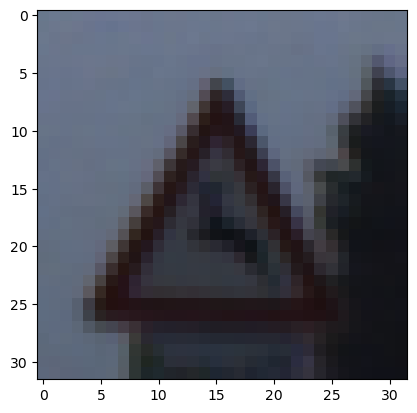

In [12]:
i = 610
plt.imshow(X_train[i])
y_train[i]

7

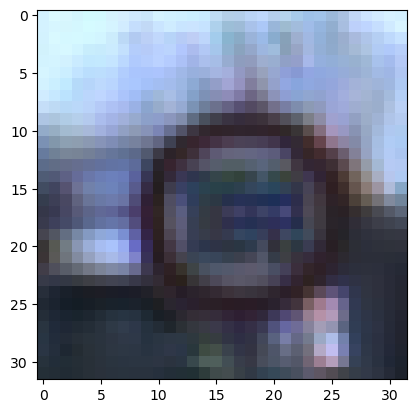

In [13]:
i = 3000
plt.imshow(X_validation[i])
y_validation[i]

34

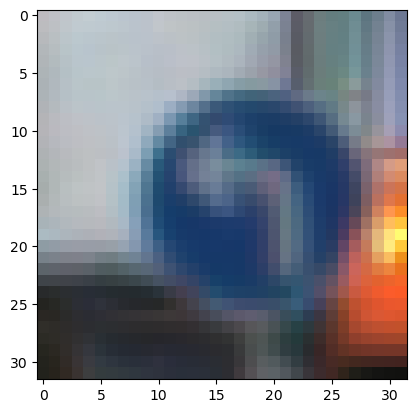

In [14]:
i = 2000
plt.imshow(X_test[i])
y_test[i]

Step3: Data Preparation

In [16]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train, y_train)

In [17]:
X_train_gray = np.sum(X_train/3,axis=3,keepdims=True)
X_validation_gray = np.sum(X_validation/3,axis=3,keepdims=True)
X_test_gray = np.sum(X_test/3,axis=3,keepdims=True)

In [18]:
X_train_gray.shape

(34799, 32, 32, 1)

In [19]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [20]:
X_test_gray.shape

(12630, 32, 32, 1)

In [21]:
X_train_gray_norm = (X_train_gray - 128) /128
X_validation_gray_norm = (X_validation_gray - 128) /128
X_test_gray_norm = (X_test_gray - 128) /128

In [22]:
X_test_gray_norm

array([[[[ 0.1171875 ],
         [ 0.10416667],
         [ 0.11458333],
         ...,
         [-0.07552083],
         [-0.04947917],
         [-0.16666667]],

        [[ 0.12760417],
         [ 0.1171875 ],
         [ 0.12760417],
         ...,
         [ 0.140625  ],
         [ 0.13020833],
         [ 0.11979167]],

        [[ 0.125     ],
         [ 0.13020833],
         [ 0.109375  ],
         ...,
         [ 0.15364583],
         [ 0.15885417],
         [ 0.14583333]],

        ...,

        [[ 0.09635417],
         [ 0.07552083],
         [ 0.08333333],
         ...,
         [ 0.09635417],
         [ 0.09375   ],
         [ 0.1171875 ]],

        [[ 0.08854167],
         [ 0.08333333],
         [ 0.06770833],
         ...,
         [ 0.08072917],
         [ 0.08854167],
         [ 0.09635417]],

        [[ 0.078125  ],
         [ 0.06510417],
         [ 0.09114583],
         ...,
         [ 0.09375   ],
         [ 0.09895833],
         [ 0.10416667]]],


       [[[-0.50520833],


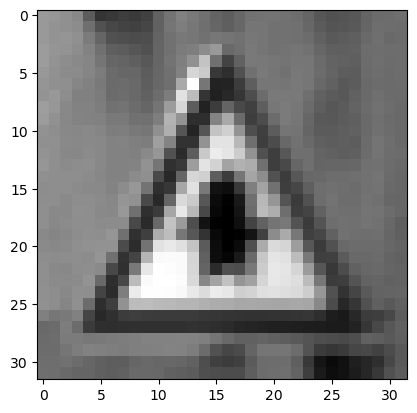

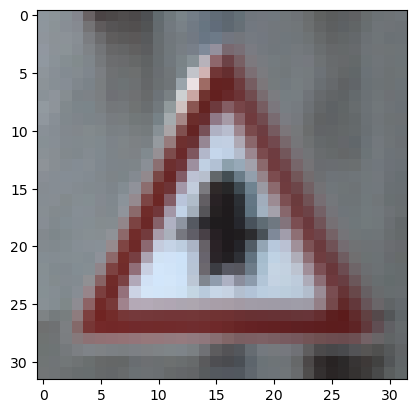

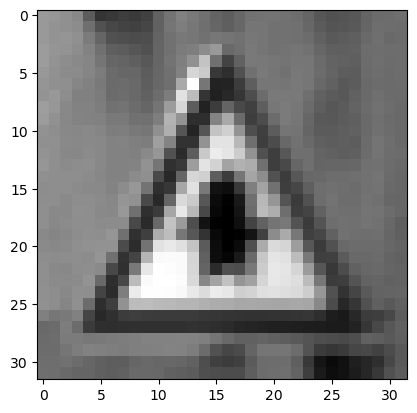

In [23]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

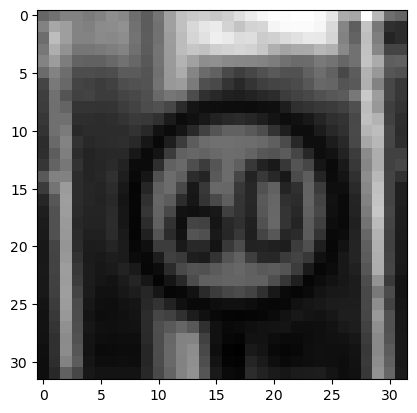

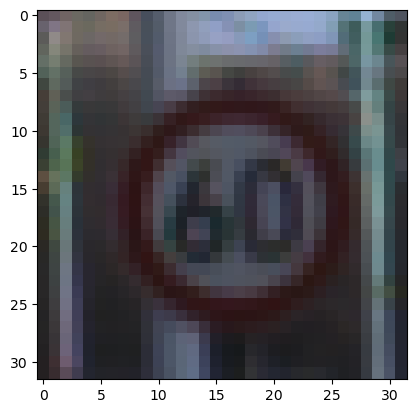

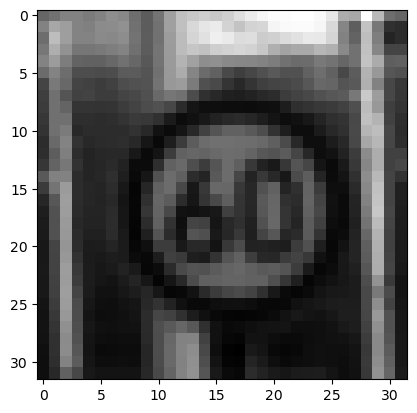

In [24]:
i = 850
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap='gray')

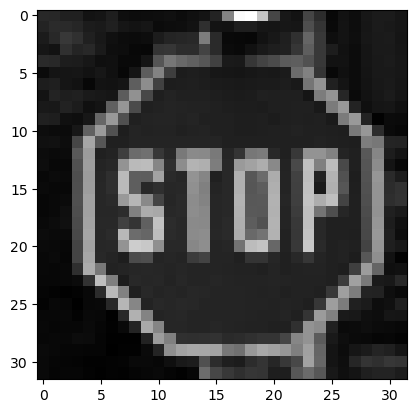

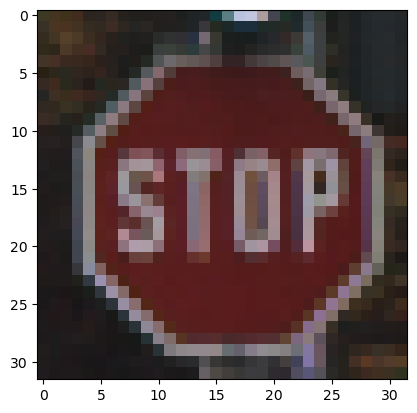

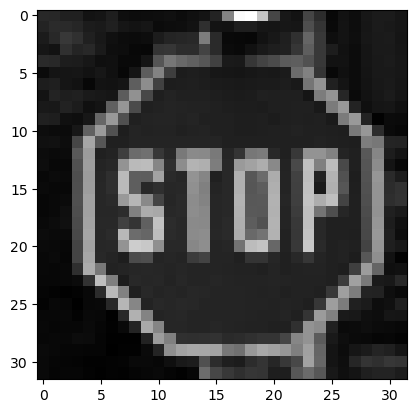

In [25]:
i = 111
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray')

Step4: Model Training

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [28]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

D:\User\a\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer= Adam(learning_rate = 0.001),metrics = ['accuracy'])

In [30]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size=1,
             epochs=5,
             verbose=1,
             validation_data =(X_validation_gray_norm,y_validation))

Epoch 1/5
34799/34799 ━━━━━━━━━━━━━━━━━━━━ 102s 3ms/step - accuracy: 0.6621 - loss: 1.2265 - val_accuracy: 0.8526 - val_loss: 0.6053
Epoch 2/5
34799/34799 ━━━━━━━━━━━━━━━━━━━━ 102s 3ms/step - accuracy: 0.9444 - loss: 0.2053 - val_accuracy: 0.8982 - val_loss: 0.4982
Epoch 3/5
34799/34799 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9619 - loss: 0.1494 - val_accuracy: 0.9036 - val_loss: 0.7886
Epoch 4/5
34799/34799 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - accuracy: 0.9649 - loss: 0.1394 - val_accuracy: 0.9011 - val_loss: 0.7972
Epoch 5/5
34799/34799 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9701 - loss: 0.1314 - val_accuracy: 0.9095 - val_loss: 0.8416


Step5: Model Evaluation

In [32]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8982 - loss: 0.8254
Test Accuracy: 0.8979414105415344


In [33]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [34]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

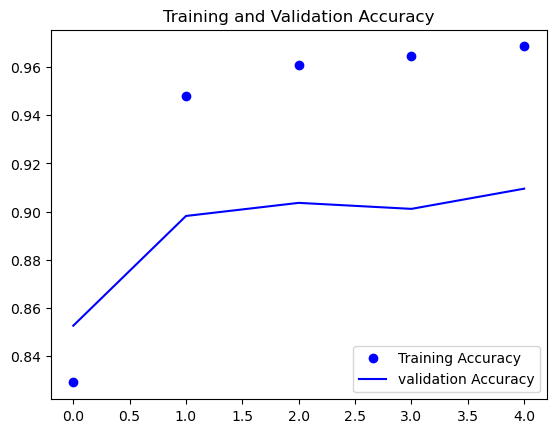

In [35]:
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.legend()

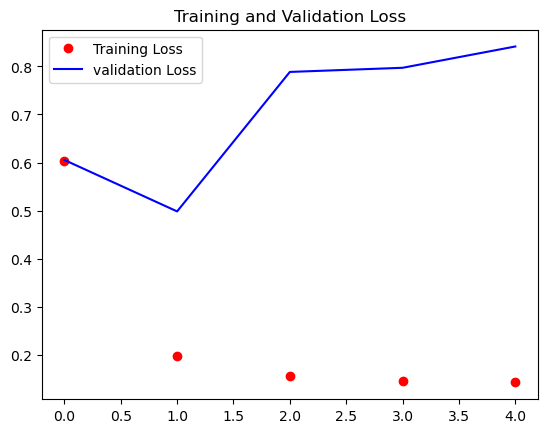

In [36]:
plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='validation Loss')

plt.title('Training and Validation Loss')
plt.legend()

In [38]:
#get the predictions for the test data
predicted_classes = cnn_model.predict(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

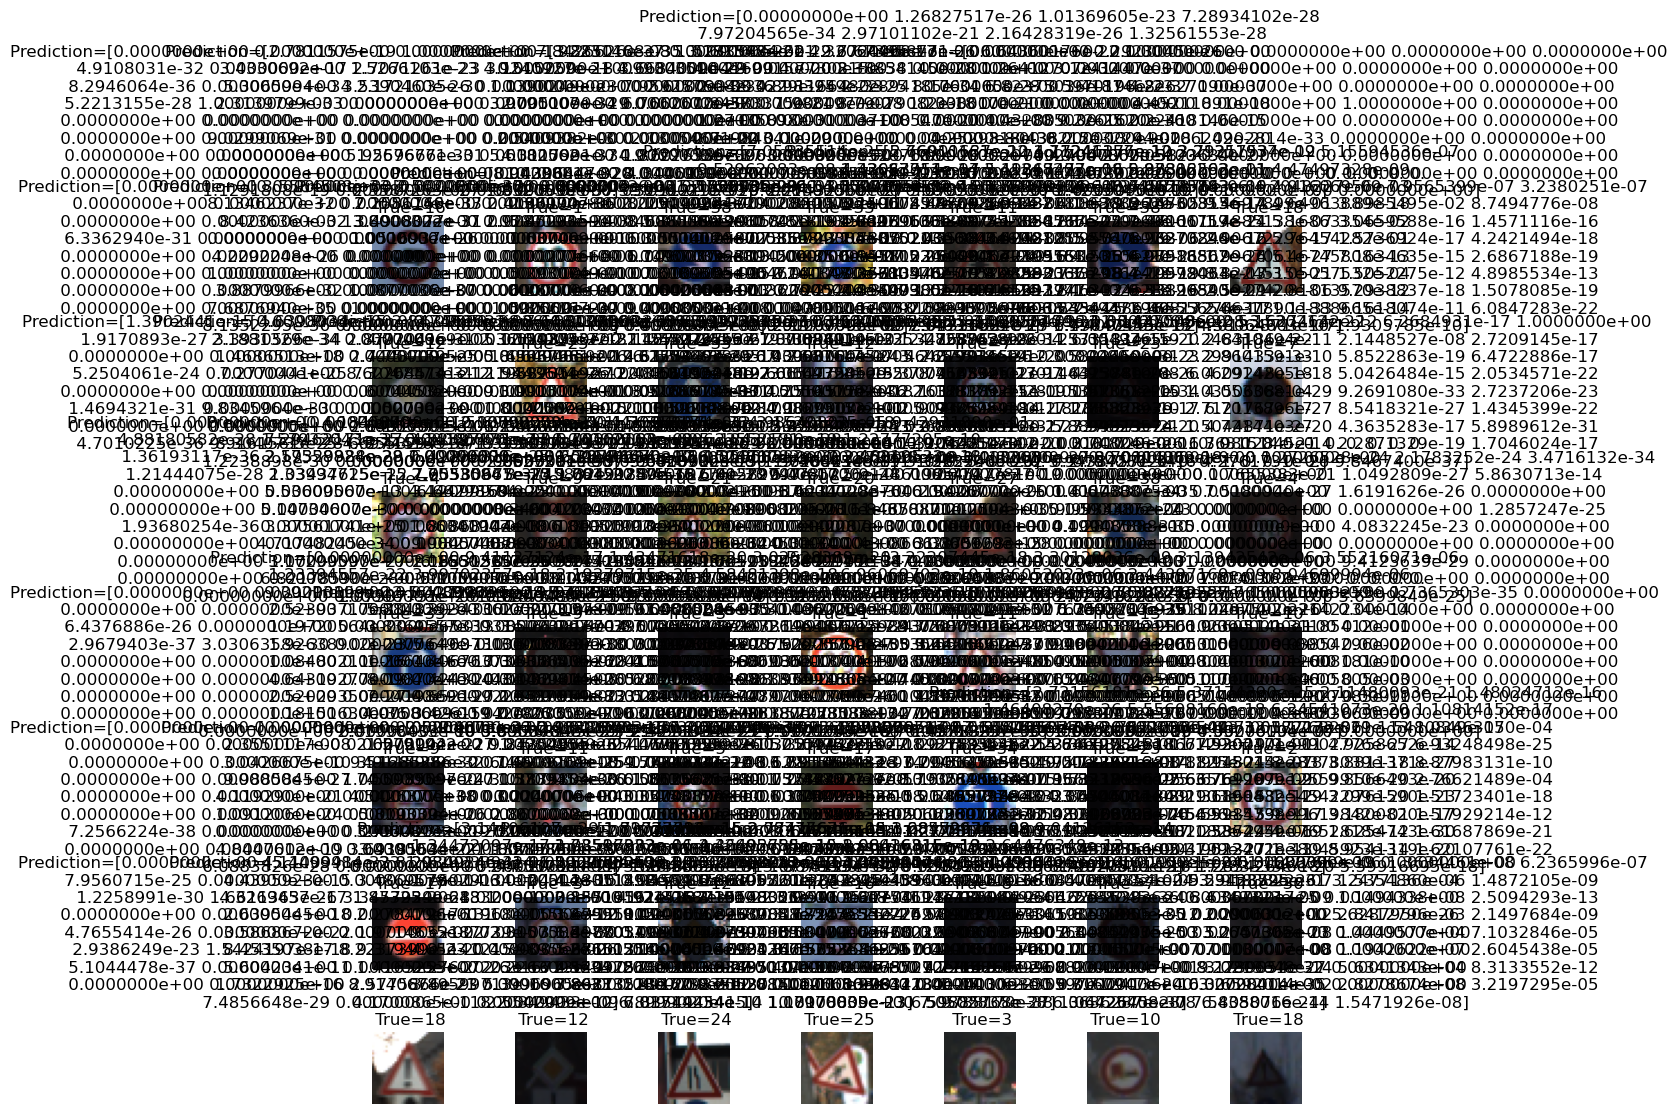

In [42]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)